<a href="https://colab.research.google.com/github/skdmajee/fastai/blob/master/lesson1-HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
import sys
sys.version

In [0]:
!pip3 list|grep fastai


fastai                   1.0.60         


In [0]:
!pip3 install fastai

#Install Requirements



In [0]:
!pip3 install google_images_download

In [0]:
!pip3 install selenium

In [0]:
!apt-get update
!apt install chromium-chromedriver

In [0]:
!apt install imagemagick

In [0]:
!pip3 install icrawler

In [0]:
!pip3 install python-magic

In [0]:
!pip3 uninstall python-magic

In [0]:
!pip install python-magic


In [0]:
!apt install libmagic-dev

#Using googliser


In [0]:
from fastai import *

In [0]:
!apt install imagemagick

In [0]:
 !bash <(wget -qO- git.io/get-googliser)

In [0]:
!googliser -h

In [0]:
!googliser --phrase "orange fruit" --color 'full' --format 'jpg' --number 50 --upper-size 100000 -o './data/orange'

In [0]:
!googliser --phrase "apple fruit" --color 'full' --format 'jpg' --number 50 --upper-size 100000 -o './data/apple'

In [0]:
from pathlib import *
import os

print('importing ')

data_dir=Path.cwd()/'data'
train_dir=Path.cwd()/'traind'
train_dir.mkdir(parents=True, exist_ok=True)
#tagname='apple-'
idx=0
for f in data_dir.rglob('*'):
    if f.is_file() == False:
        continue
    fn=PurePath(f)
    tagname=fn.parts[len(fn.parts)-2]
    #print(f'tagname={tagname}')
    if fn.name.startswith('image') == False: 
            print(f'******skipping {fn.name}')
            continue
    newfn=tagname+'-'+str(idx)+fn.suffix
    idx += 1
    npath=train_dir/newfn
    #print(f'Rename:{fn} --> {npath}')
    f.rename(npath)

importing 


In [0]:
!ls traind/

apple-0.jpeg   apple-24.jpeg  apple-39.jpeg   orange-48.png   orange-64.jpeg
apple-10.jpeg  apple-25.jpeg  apple-3.jpeg    orange-49.jpeg  orange-65.jpeg
apple-11.jpeg  apple-26.jpeg  apple-40.jpeg   orange-50.jpeg  orange-66.jpeg
apple-12.jpeg  apple-27.jpeg  apple-41.jpeg   orange-51.jpeg  orange-67.jpeg
apple-13.jpeg  apple-28.jpeg  apple-42.jpeg   orange-52.jpeg  orange-68.jpeg
apple-14.jpeg  apple-29.jpeg  apple-43.jpeg   orange-53.jpeg  orange-69.jpeg
apple-15.jpeg  apple-2.jpeg   apple-44.jpeg   orange-54.jpeg  orange-70.jpeg
apple-16.jpeg  apple-30.jpeg  apple-4.jpeg    orange-55.jpeg  orange-71.jpeg
apple-17.jpeg  apple-31.jpeg  apple-5.jpeg    orange-56.jpeg  orange-72.jpeg
apple-18.jpeg  apple-32.jpeg  apple-6.jpeg    orange-57.jpeg  orange-73.jpeg
apple-19.jpeg  apple-33.png   apple-7.jpeg    orange-58.jpeg  orange-74.jpeg
apple-1.jpeg   apple-34.jpeg  apple-8.jpeg    orange-59.jpeg  orange-75.jpeg
apple-20.jpeg  apple-35.png   apple-9.jpeg    orange-60.jpeg  orange-76.jpeg

#Using google-image-dowloader

In [0]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)

In [0]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"Polar bears,baloons,Beaches","limit":20,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

#Using ai-utilites to get data


In [0]:
from fastai.imports import *

In [0]:
!git clone https://github.com/prairie-guy/ai_utilities.git

In [0]:
!ls -al


## Getting dataset

Creating dataset from google image search or equivalent.

In [0]:
from fastai.imports import *

In [0]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)



In [0]:
import sys
sys.path.append('./ai_utilities')
sys.path

In [0]:
from ai_utilities import *
path=Path.cwd()/'dataset'
image_download('mango',1)

In [0]:
!pwd
!ls -al /content/dataset/mango


/content
total 8
drwxr-xr-x 2 root root 4096 Apr 20 22:59 .
drwxr-xr-x 3 root root 4096 Apr 20 23:00 ..


In [0]:
from pathlib import Path
path=Path.cwd()/'datas'
fruits=['apple', 'mango', 'orange']
for f in fruits:
  p= path/f
  print(p.resolve())
  p.mkdir(mode=777,parents=True,exist_ok=True)
  



/content/datas/apple
/content/datas/mango
/content/datas/orange


In [0]:
!mkdir -p dataset/apple  dataset/mango

In [0]:
from ai_utilities import *

pets = ['dog', 'mango' ]
for p in pets:
    image_download(p, 100)
    
path = Path.cwd()/'dataset'    
make_train_valid(path)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

In [0]:
fruits=['apple', 'mango', 'orange']
for f in fruits:
  image_download(f, num_images=50, image_dir='datas')

#Processing the Images

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
bs=64

In [0]:
help(ImageDataBunch)

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

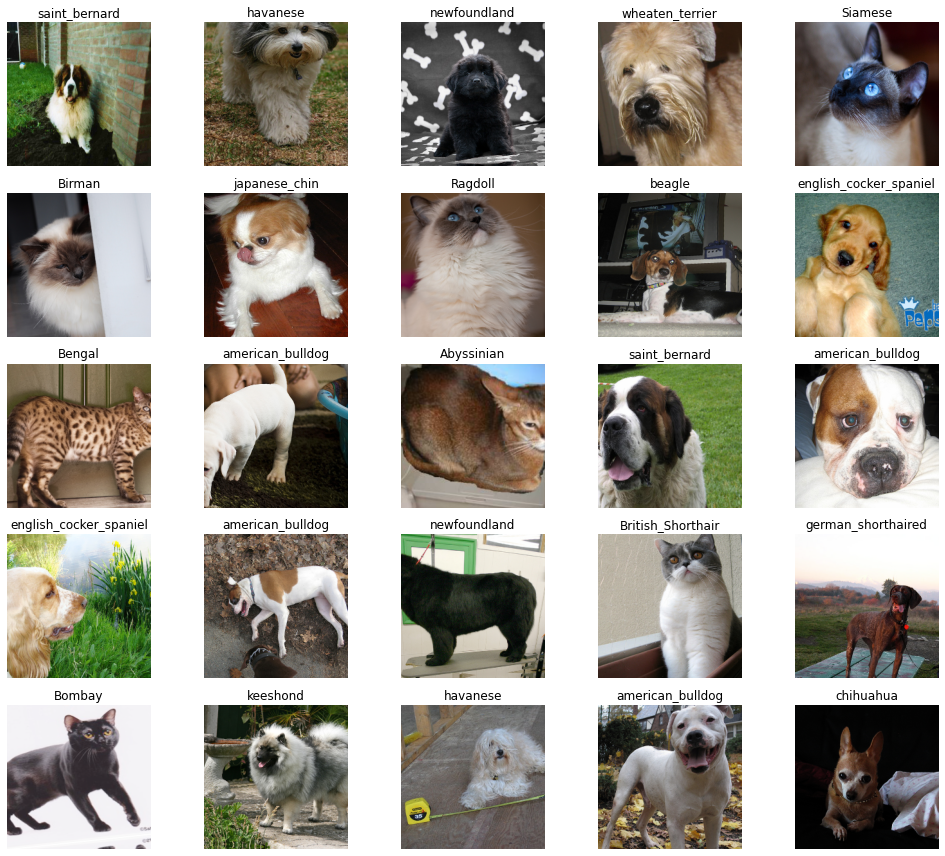

In [0]:
data.show_batch(rows=5, figsize=(14,12))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.389696,0.346633,0.117050,01:26
1,0.609418,0.322361,0.102842,01:23
2,0.371166,0.267669,0.088633,01:22
3,0.276209,0.261664,0.081867,01:22


In [0]:
learn.save('stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

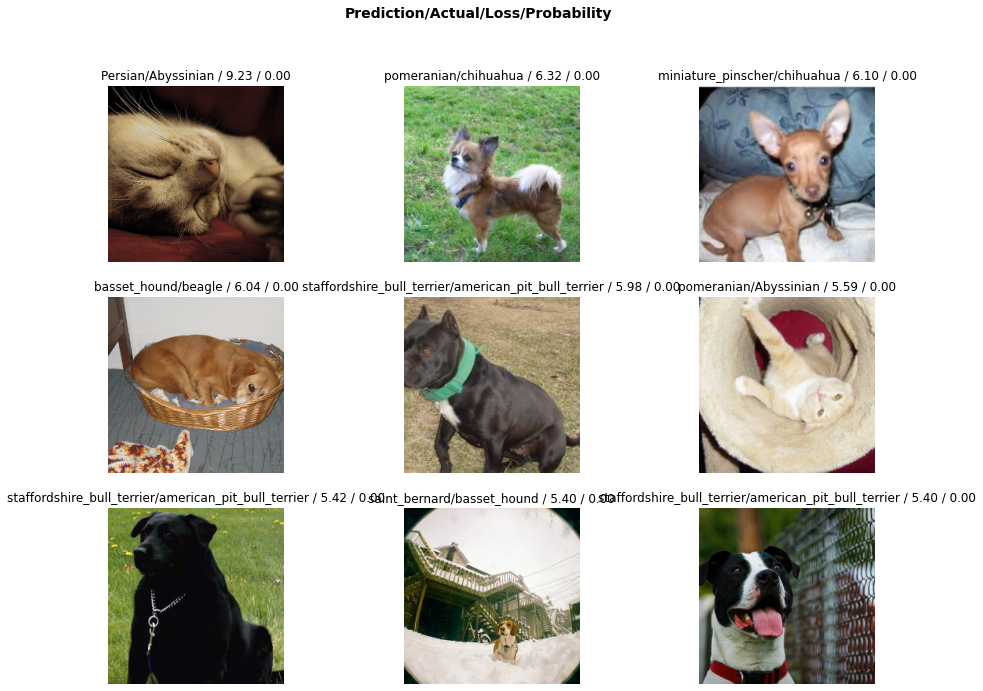

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

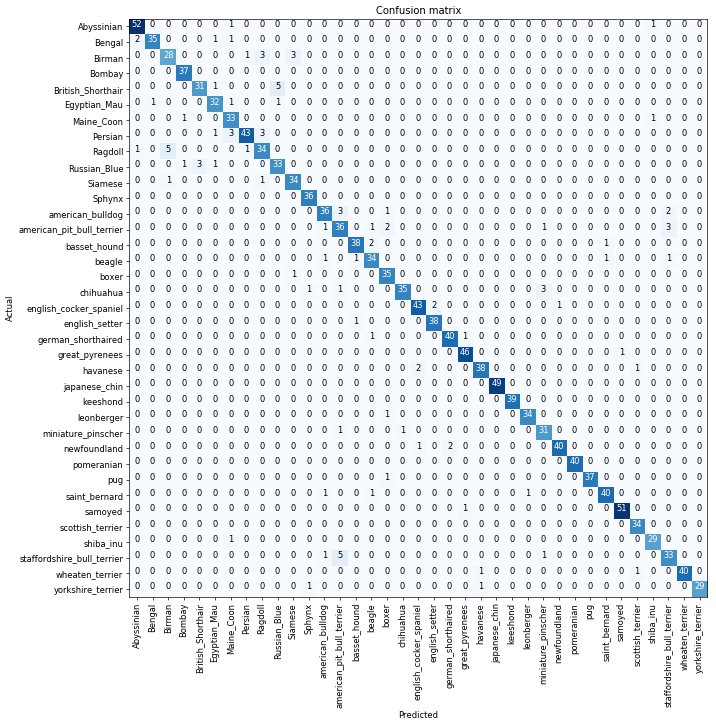

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('British_Shorthair', 'Russian_Blue', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('Ragdoll', 'Birman', 6),
 ('Persian', 'Maine_Coon', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'saint_bernard', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('havanese', 'scottish_terrier', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('wheaten_terrier', 'havanese', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.680396,0.399078,0.131258,01:29


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


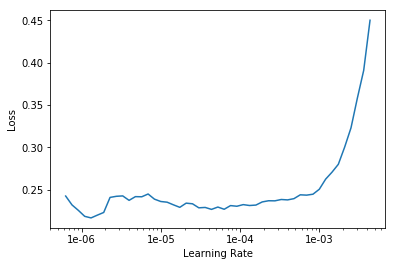

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.242544,0.208489,0.067659
2,0.206940,0.204482,0.062246


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


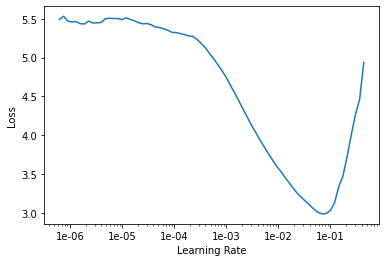

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.727853,0.286435,0.088633,02:14
1,0.500891,0.296832,0.085927,02:16
2,0.406566,0.259717,0.077808,02:12
3,0.329439,0.237905,0.075101,02:09
4,0.262055,0.209859,0.056157,02:09
5,0.191415,0.190899,0.059540,02:10
6,0.128698,0.196386,0.054804,02:12
7,0.105414,0.200115,0.053451,02:10


In [0]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Total time: 03:27
epoch  train_loss  valid_loss  error_rate
1      0.097319    0.155017    0.048038    (01:10)
2      0.074885    0.144853    0.044655    (01:08)
3      0.063509    0.144917    0.043978    (01:08)



If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Bengal', 'Abyssinian', 4),
 ('boxer', 'american_bulldog', 4),
 ('Ragdoll', 'Birman', 4),
 ('Egyptian_Mau', 'Bengal', 3)]

## Other data formats

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

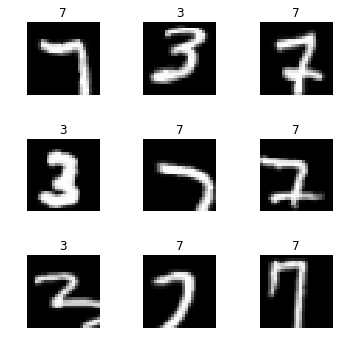

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      0.116117    0.029745    0.991168  (00:12)
2      0.056860    0.015974    0.994603  (00:10)



In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

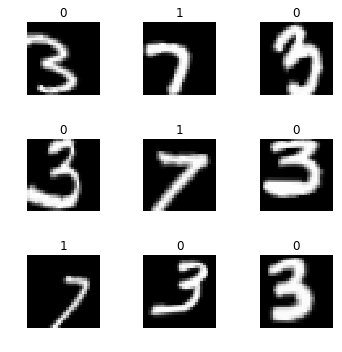

In [0]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']